In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data

In [2]:
df = pd.read_csv("voice.csv")
df.head(30) #show a bit more of the dataset

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male



The id is just an ID variable, we don't use it.
Label is the dependent variable
There are 5 variables that are easy to work with: Mode (mode frequency), sfm (spectral flatness), sp.ent (spectral entropy), kurt (kurtosis), skew (skewness), label (male or female).

# Data cleaning

We have to drop the rows with NaN's because the k-NN algorithm won't work with them.

In [3]:
df.label.value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [4]:
df = df[['mode','sfm', 'sp.ent', 'kurt', 'skew', 'label']]
df = df.dropna() #deleting the rows with NaN

df.head()

,mode,sfm,sp.ent,kurt,skew,label
0,0.000000,0.491918,0.893369,274.402906,12.863462,male
1,0.000000,0.513724,0.892193,634.613855,22.423285,male
2,0.000000,0.478905,0.846389,1024.927705,30.757155,male
3,0.083878,0.727232,0.963322,4.177296,1.232831,male
4,0.104261,0.783568,0.971955,4.333713,1.101174,male


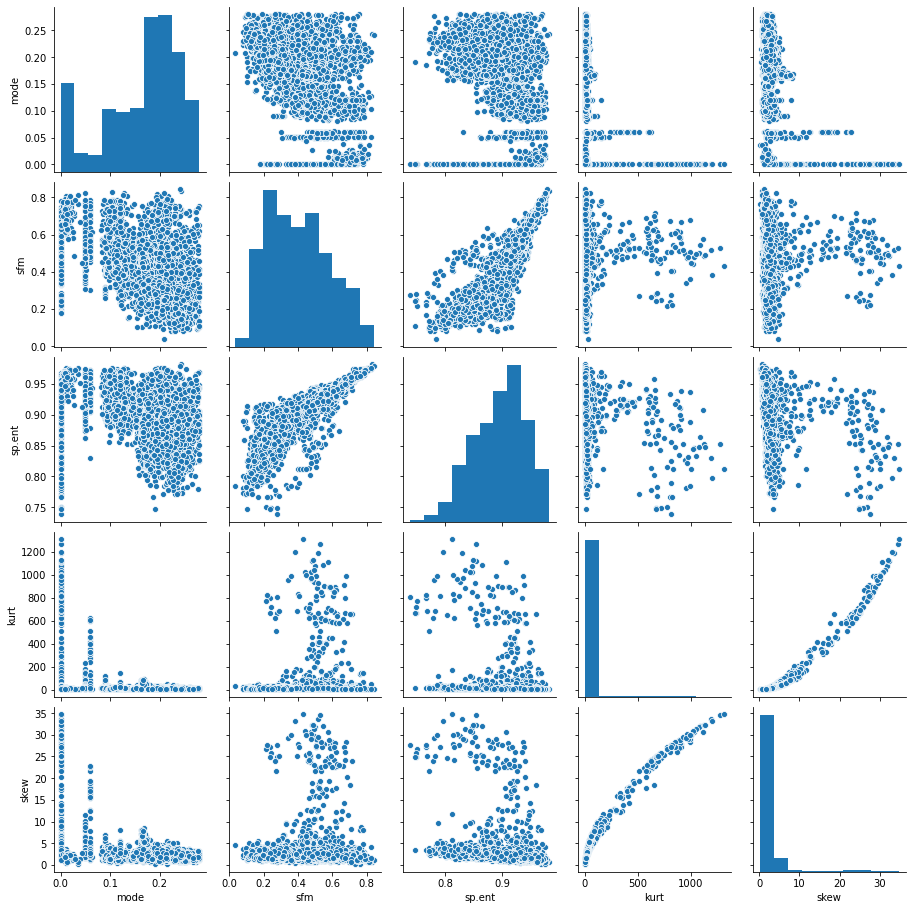

In [5]:
sns.pairplot(df)
plt.show()

Our dependent variable is a qualitative variable and we can't work with that. So we have to replace "male" with 0 and "female" with 1.

In [6]:
df['label'] = [0 if i=='male' else 1 for i in df.label]
df.label.value_counts()
df.head()

,mode,sfm,sp.ent,kurt,skew,label
0,0.000000,0.491918,0.893369,274.402906,12.863462,0
1,0.000000,0.513724,0.892193,634.613855,22.423285,0
2,0.000000,0.478905,0.846389,1024.927705,30.757155,0
3,0.083878,0.727232,0.963322,4.177296,1.232831,0
4,0.104261,0.783568,0.971955,4.333713,1.101174,0


# Building the model

Let's build the model. Female and male are perfectly correlated thats why the model wouldn't be able to distinguish between them.

In [7]:
X = df[['mode', 'sfm', 'sp.ent', 'kurt', 'skew']] #create the X matrix

y = df['label'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,mode,sfm,sp.ent,kurt,skew
1866,0.225327,0.601127,0.941751,5.560671,1.597069
767,0.201264,0.420416,0.908148,9.115040,2.312101
2862,0.244331,0.166600,0.813883,8.151319,2.352412
1064,0.222677,0.322959,0.911062,7.871708,1.742157
270,0.017134,0.613985,0.940602,10.411437,2.462172


In [8]:
y_train.head(5) #show the head of the training set

1866    1
767     0
2862    1
1064    0
270     0
Name: label, dtype: int64

In [9]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=3) #create a KNN-classifier with 3 neighbors
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

# Model evaluation

Let's start by calculating accuracy. As always, we do the evaluation on the test data.

In [18]:
knn.score(X_test, y_test) 

0.7434279705573081

Accuracy is 74.34%. 

In [11]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[379, 115],
       [129, 328]], dtype=int64)

How do I know which row is which (man or female)? There's an attribute for that in our model:

In [12]:
knn.classes_

array([0, 1], dtype=int64)

The first outcome is "0" (man) and the second outcome is "1" (female). Printing the table:

In [13]:
conf_matrix = pd.DataFrame(cm, index=['Male (actual)', 'Female (actual)'], columns = ['Male (predicted)', 'Female (predicted)']) #make a dataframe, put labels on rows (index) and columns 
conf_matrix

,Male (predicted),Female (predicted)
Male (actual),379,115
Female (actual),129,328


* Accuracy
Let's start with the accuracy.

In [14]:
(328+379)/(328+129+115+379)

0.7434279705573081

Accuracy is 74.34%

* Precision (Female)

Let's start with precision. This is the number of correctly female, divided by the total number of female.

Question to Jonas: where do I know which one (female or male) to use?

In [15]:
379 / (129 + 379)

0.7460629921259843

Precision is 74.6%, so a little bit better than accuracy but almost equal.

* Recall (female)

Now recall. This is the number of correctly predicted female, divided by the total number of actual female. 

In [16]:
379/(115+379)

0.7672064777327935

So 76.72%. So also better than the accurancy

# Parameter setting

In [17]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       494
           1       0.72      0.70      0.71       457

    accuracy                           0.72       951
   macro avg       0.72      0.72      0.72       951
weighted avg       0.72      0.72      0.72       951

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       494
           1       0.84      0.58      0.69       457

    accuracy                           0.75       951
   macro avg       0.77      0.74      0.74       951
weighted avg       0.77      0.75      0.74       951

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       494
           1       0.74      0.72      0.73       457

    accuracy                           0.74       951
   macro avg       0.74      0.7

The scores seem broadly similar, but 3 neighbors seem to give the best result. 